#GK제거

In [8]:
import pandas
import matplotlib.pyplot as plt
df=pandas.read_csv('C:\\Riot Games\\FIFA\\data.csv')
arr=[]
for x in range(int(df.size/89)):
    if df.iloc[x][21]=='GK':
        arr.append(x)
df=df.drop(arr)
print(df)

       Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
4               4  192985        K. De Bruyne   27   
5               5  183277           E. Hazard   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5     

#상위2000명groupby

In [9]:
posmean=df.iloc[0:2000].groupby(['Position'])[['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'
]].mean()
print(posmean)

           Crossing  Finishing  HeadingAccuracy  ShortPassing    Volleys  \
Position                                                                   
CAM       72.698529  71.316176        55.720588     78.161765  69.345588   
CB        47.979866  35.912752        77.194631     68.624161  38.046980   
CDM       61.917431  53.183486        65.275229     78.541284  53.651376   
CF        67.153846  75.692308        61.153846     76.461538  75.846154   
CM        68.909091  63.712121        60.219697     79.734848  63.356061   
LAM       82.666667  74.000000        61.000000     82.333333  76.333333   
LB        77.725000  51.416667        65.775000     74.883333  51.333333   
LCB       48.766667  37.091667        76.166667     68.366667  37.075000   
LCM       68.125000  62.647727        59.795455     79.477273  61.204545   
LDM       67.027778  62.916667        62.861111     79.333333  60.472222   
LF        76.500000  75.833333        57.000000     83.166667  74.500000   
LM        73

#행추가(연봉)

In [10]:
arr2=[]
for x in range(int(df.size/89)):
    str='0'
    str=str+df.iloc[x][12][1]
    if str=='00':
        pass
    elif df.iloc[x][12][2]!='K':
        str=str+df.iloc[x][12][2]
        if df.iloc[x][12][3]!='K':
            str=str+df.iloc[x][12][3]
    arr2.append(int(str))
df['wage']=None
df['wage']=arr2

#그래프그리기

<AxesSubplot:xlabel='Age'>

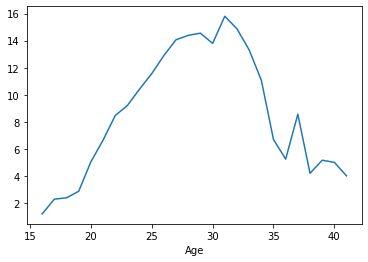

In [11]:
import matplotlib.pyplot as plt
agewage=df.groupby('Age')['wage'].mean()
agewage.plot()

<AxesSubplot:xlabel='Overall'>

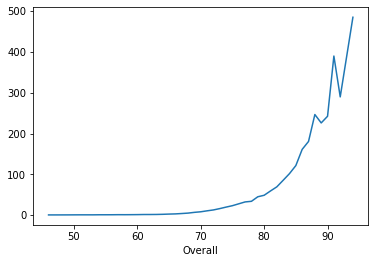

In [12]:
overallwage=df.groupby('Overall')['wage'].mean()
overallwage.plot()

#포지션이 비어있는경우제거

In [23]:
df=pandas.read_csv('C:\\Riot Games\\FIFA\\data.csv')
df=df.iloc[0:2000]
arr=[]
dfisna=df['Position'].isna()
for x in range(int(df.size/89)):
    if dfisna.iloc[x]==True:
        arr.append(x)
df.drop(arr)
arr=[]
for x in range(int(df.size/89)):
    if df.iloc[x][21]=='GK':
        arr.append(x)
df=df.drop(arr)
arr=[]
dfisna=df['Crossing'].isna()
for x in range(int(df.size/89)):
    if dfisna.iloc[x]==True:
        arr.append(x)
df.drop(arr)
print(df)

      Unnamed: 0      ID               Name  Age  \
0              0  158023           L. Messi   31   
1              1   20801  Cristiano Ronaldo   33   
2              2  190871          Neymar Jr   26   
4              4  192985       K. De Bruyne   27   
5              5  183277          E. Hazard   27   
...          ...     ...                ...  ...   
1995        1995  220883           R. Borré   22   
1996        1996  190931       E. Zukanović   31   
1997        1997  236245            A. Elis   22   
1998        1998  174549       M. Fernández   32   
1999        1999  213974       D. Rodríguez   28   

                                               Photo         Nationality  \
0     https://cdn.sofifa.org/players/4/19/158023.png           Argentina   
1      https://cdn.sofifa.org/players/4/19/20801.png            Portugal   
2     https://cdn.sofifa.org/players/4/19/190871.png              Brazil   
4     https://cdn.sofifa.org/players/4/19/192985.png             Belgiu

#머신러닝

In [26]:
from sklearn.linear_model import LogisticRegression
arrX=[]
arrY=[]
for x in range(int(df.size/89)):
    arr3=[]
    for y in range(34):
        arr3.append(int(df.iloc[x][54+y]))
    arrX.append(arr3)
    if df.iloc[x][21]=='LB' or df.iloc[x][21]=='LWB':
        arrY.append(3)
    elif df.iloc[x][21]=='LCB':
        arrY.append(1)
    elif df.iloc[x][21]=='CB':
        arrY.append(0)
    elif df.iloc[x][21]=='RCB':
        arrY.append(2)
    elif df.iloc[x][21]=='RB' or df.iloc[x][21]=='RWB':
        arrY.append(4)
    elif df.iloc[x][21]=='LDM':
        arrY.append(6)
    elif df.iloc[x][21]=='CDM':
        arrY.append(5)
    elif df.iloc[x][21]=='RDM':
        arrY.append(7)
    elif df.iloc[x][21]=='LM':
        arrY.append(11)
    elif df.iloc[x][21]=='LCM':
        arrY.append(9)
    elif df.iloc[x][21]=='CM':
        arrY.append(8)
    elif df.iloc[x][21]=='RCM':
        arrY.append(10)
    elif df.iloc[x][21]=='RM':
        arrY.append(12)
    elif df.iloc[x][21]=='LAM':
        arrY.append(14)
    elif df.iloc[x][21]=='CAM':
        arrY.append(13)
    elif df.iloc[x][21]=='RAM':
        arrY.append(15)
    elif df.iloc[x][21]=='LW':
        arrY.append(19)
    elif df.iloc[x][21]=='LS':
        arrY.append(17)
    elif df.iloc[x][21]=='ST':
        arrY.append(16)
    elif df.iloc[x][21]=='RS':
        arrY.append(18)
    elif df.iloc[x][21]=='RW':
        arrY.append(20)
    elif df.iloc[x][21]=='LF':
        arrY.append(22)
    elif df.iloc[x][21]=='CF':
        arrY.append(21)
    elif df.iloc[x][21]=='RF':
        arrY.append(23)
clf=LogisticRegression(random_state=0).fit(arrX,arrY)
clf.predict([arrX[0]])
a=clf.predict_proba([arrX[0]])

C:\Users\conan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1.84558127e-16, 5.36786136e-15, 2.82473612e-15, 2.74447329e-08,
        2.87635843e-10, 7.69838984e-11, 2.09034730e-06, 2.88616543e-07,
        2.24367275e-04, 3.52397141e-04, 6.93648574e-05, 3.14539406e-02,
        9.51664176e-03, 6.16356633e-01, 5.36359414e-03, 6.08415447e-04,
        3.34769811e-02, 9.04024594e-03, 5.39048254e-03, 1.10429752e-02,
        2.35423447e-02, 1.55213477e-01, 1.75276788e-02, 8.08180535e-02]])